# Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import zipfile
fil=zipfile.ZipFile('drive/My Drive/LSTM/jigsaw-toxic-comment-classification-challenge.zip','r')
fil.extractall()
fil.close()

In [3]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


Using TensorFlow backend.


In [0]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [5]:
train


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [0]:
# for feature in train.columns[2:]:
a=len(train[train['toxic']==1])
b=len(train[train['severe_toxic']==1])
c=len(train[train['obscene']==1])
d=len(train[train['insult']==1])
e=len(train[train['threat']==1])
f=len(train[train['identity_hate']==1])

# a
# identity_hate

# len(a)
# len(train)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


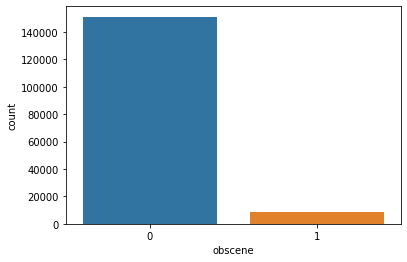

In [7]:
import seaborn as sns
sns.countplot(train['obscene'])

In [0]:
# a

#Text Cleaning and Preprocessing

In [0]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [0]:
def clean_text(text,remove_stopwords=True):
  
  text=text.lower()
  if True:
    text=text.split()
    new_text=[]
    for word in text:
      if word in contractions:
        new_text.append(contractions[word])
      else:
        new_text.append(word)
    text=" ".join(new_text)
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)
  return text   

In [11]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
clean_comments=[]
for comment in train.comment_text:
  clean_comments.append(clean_text(comment))
print('Comments are complete')

# clean_texts=[]
# for text in data.text:
#   clean_texts.append(clean_text(text))
# print('Text are complete')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Comments are complete


In [0]:
train['comment_text']=clean_comments


In [13]:
train.shape

(159571, 8)

In [0]:
train.drop(train[(train['insult']==0) & (train['toxic']==0) & (train['severe_toxic']==0) & (train['obscene']==0) & (train['threat']==0)& (train['insult']& (train['identity_hate']==0)==0)].index,inplace=True)


In [15]:
train.shape

(16171, 8)

In [16]:
train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [0]:
list_classes=['toxic','severe_toxic','obscene','threat','insult','identity_hate']
y=train[list_classes].values
list_sentence_train=train['comment_text']
list_sentence_test=test['comment_text']


In [0]:
max_features=2000
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentence_train))
list_tokenizer_train=tokenizer.texts_to_sequences(list_sentence_train)
list_tokenizer_test=tokenizer.texts_to_sequences(list_sentence_test)


In [19]:
list_tokenizer_train[:1]


[[122, 449, 182, 129]]

In [0]:
maxlen=200
X_t=pad_sequences(list_tokenizer_train,maxlen=maxlen)
X_tes=pad_sequences(list_tokenizer_test,maxlen=maxlen)


In [0]:
total_num_words=[len(one_comment) for one_comment in list_tokenizer_train]

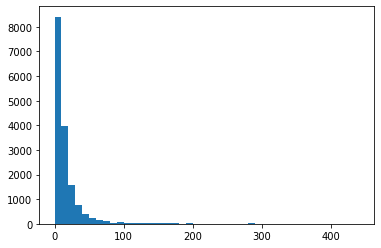

In [22]:
import matplotlib.pyplot as plt
plt.hist(total_num_words,bins=np.arange(0,450,10))
plt.show()

In [0]:

from keras.layers import Dense,LSTM,Embedding,Dropout,Activation,GlobalMaxPooling1D
from keras.models import Sequential

#Loading pretrained Glove Embeddings

In [24]:
from zipfile import ZipFile
file='drive/My Drive/glove6b100dtxt.zip'
# file='Word-Embeddding-Sentiment-Classification-master.zip'

with ZipFile(file,'r')as zip:
  zip.extractall()
  print('Dome')

Dome


In [25]:
import os
embeddings_index = {}
f = open(os.path.join('', 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
from keras.layers import Embedding

EMBEDDING_DIM=100
embedding_matrix_x = np.zeros((len(tokenizer.word_index) + 1, EMBEDDING_DIM))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix_x[i] = embedding_vector
        
embedding_layer = Embedding(len(tokenizer.word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix_x],
                            input_length=200,
                            trainable=False)

#Model Building

In [0]:
embed_Size=128
model=Sequential()
model.add(embedding_layer)
# model.add(Embedding(max_features,embed_Size,input_length=200))
model.add(LSTM(60, name='lstm_layer'))

model.add(Dense(6,activation='sigmoid'))


In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=(['accuracy']))

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_t,y,test_size=0.2)



In [30]:
model.fit(X_train,y_train,epochs=15,batch_size=16,validation_data=(X_val,y_val))

Train on 12936 samples, validate on 3235 samples
Epoch 1/15
12936/12936 [==============================] - 410s 32ms/step - loss: 0.3276 - accuracy: 0.8600 - val_loss: 0.2840 - val_accuracy: 0.8809
Epoch 2/15
12936/12936 [==============================] - 412s 32ms/step - loss: 0.2889 - accuracy: 0.8776 - val_loss: 0.2702 - val_accuracy: 0.8870
Epoch 3/15
12936/12936 [==============================] - 403s 31ms/step - loss: 0.2752 - accuracy: 0.8831 - val_loss: 0.2689 - val_accuracy: 0.8870
Epoch 4/15
12936/12936 [==============================] - 405s 31ms/step - loss: 0.2657 - accuracy: 0.8876 - val_loss: 0.2641 - val_accuracy: 0.8889
Epoch 5/15
12936/12936 [==============================] - 400s 31ms/step - loss: 0.2587 - accuracy: 0.8914 - val_loss: 0.2602 - val_accuracy: 0.8903
Epoch 6/15
12936/12936 [==============================] - 404s 31ms/step - loss: 0.2532 - accuracy: 0.8929 - val_loss: 0.2607 - val_accuracy: 0.8893
Epoch 7/15
12936/12936 [==============================] -

These pickle files will be used in app.py for deployment with Flask

In [0]:
import pickle
pickle.dump(tokenizer, open('drive/My Drive/tranform1.pkl', 'wb'))
pickle.dump(model, open("drive/My Drive/model1.pkl", 'wb'))

In [0]:
model.save_weights("/content/drive/My Drive/h5/model_toxic_epoch.h5")


In [0]:
model.load_weights("/content/drive/My Drive/h5/model_toxic_epoch.h5")

# Prediction of top 3 Toxicity classes for the New Comment

In [0]:
def predictComment(test_sample1):
  test_samples=[test_sample1]
  test_sample_token=tokenizer.texts_to_sequences(test_samples)
  test_sample_tokens_pad=pad_sequences(test_sample_token,maxlen=maxlen)
  a=model.predict([test_sample_tokens_pad])
  
  classes = np.array(train.columns[2:])

  top_3 = np.argsort(a[0])[:-4:-1]

  for i in range(3):
      top_3 = np.argsort(a[0])[:-4:-1]

      print("{}".format(classes[top_3[i]])+" ({:.3})".format(a[0][top_3[i]]))
      

In [70]:
# test_sample1='I will kill  you'
# test_sample1='I hate  you'
test_sample1='You are selfish'



predictComment(test_sample1)

toxic (0.896)
insult (0.472)
obscene (0.424)


In [0]:
test_sample1='My hatred for this movie'

predictComment(test_sample1)

toxic (0.92)
insult (0.0281)
identity_hate (0.00461)
